In [1]:
#参数criterion:不纯度计算 entropy and gini
#参数max_depth, min_sample_leaf,min_sample_split,max_features,min_impurity_decrease: 减枝策略
#参数n_estimators: 随机森林树木数量
#参数
#rfc = RandomForestClassifier()
#rfc = rfc.fit(x_train,y_train)
#result = rfc.score(x_test,y_test)

In [2]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [3]:
wine = load_wine()
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [6]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [7]:
print ("Decision Tree:{}".format(score_c)
       ,"Random Forest:{}".format(score_r)
      )

Decision Tree:0.9074074074074074 Random Forest:0.9814814814814815


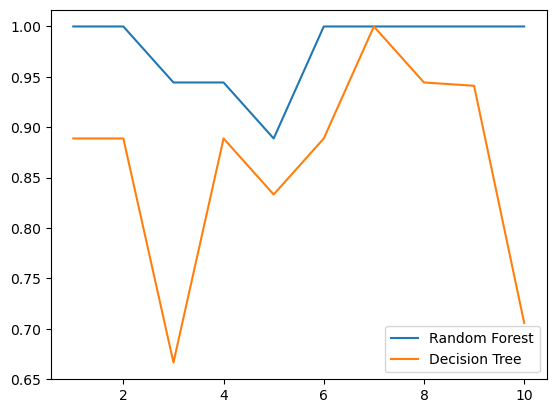

In [8]:
#1*10组交叉验证:证明rf比decision_tree表现更加良好
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier (n_estimators = 100)
rfc_s = cross_val_score(rfc,wine.data,wine.target, cv=10)

clf = DecisionTreeClassifier ()
clf_s = cross_val_score(clf,wine.data,wine.target, cv=10)

plt.plot(range(1,11), rfc_s,label = "Random Forest")
plt.plot(range(1,11), clf_s,label = "Decision Tree")
plt.legend()
plt.show()

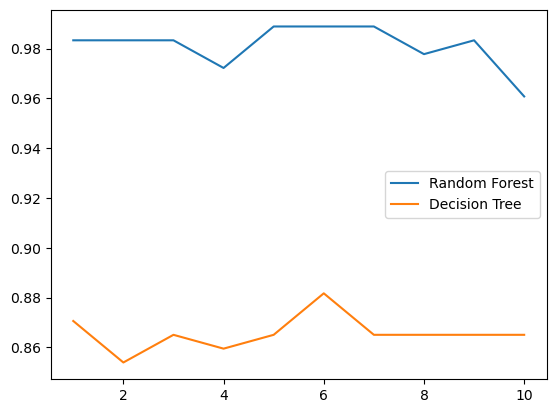

In [9]:
#10*10组交叉验证:证明rf比decision_tree表现更加良好
rfc_1 = []
clf_1 = []
for i in range(10):
    rfc = RandomForestClassifier (n_estimators = 100)
    rfc_s = cross_val_score(rfc,wine.data,wine.target, cv=10).mean()
    rfc_1.append(rfc_s)
    clf = DecisionTreeClassifier ()
    clf_s = cross_val_score(clf,wine.data,wine.target, cv=10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11), rfc_1,label = "Random Forest")
plt.plot(range(1,11), clf_1,label = "Decision Tree")

rfc = RandomForestClassifier (n_estimators = 100)
rfc_s = cross_val_score(rfc,wine.data,wine.target, cv=10)
plt.legend()
plt.show()


In [10]:
superpa = []
for i in range (1000):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs = -1)
    rfc_s = cross_val_score(rfc,wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)
    
print (max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,1001),superpa)
plt.show()

IndentationError: unexpected indent (1501934132.py, line 3)

In [11]:
####3个重要属性
##.estimators:返回建的森林的列表:每个决策树(参数)的样子
##.oob_score_:返回袋外得分:随机森林是"有放回"的随机抽样,因此有一些数从来没被抽中过，这些数据为out.of.bag数据.用袋外数据测试模型精确度
##.feature_importances_
####常用接口
##apply,fit,predict,score
##predict_proba:返回每个测试样本被分到哪个类的概率

rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.score(Xtest,Ytest)

0.9629629629629629

In [12]:
rfc.feature_importances_

array([0.14446434, 0.04757677, 0.01037061, 0.02160399, 0.03398249,
       0.06304759, 0.159732  , 0.01030556, 0.0191004 , 0.12735833,
       0.06953653, 0.0715333 , 0.22138809])

In [13]:
rfc.apply(Xtest)

array([[15,  2,  6, ...,  2,  6,  8],
       [ 3,  2,  6, ...,  2,  6, 21],
       [23,  2,  9, ..., 15, 16, 24],
       ...,
       [15,  2,  6, ...,  2,  6,  8],
       [ 3, 13,  3, ..., 11, 11, 23],
       [ 3, 13,  3, ..., 11, 11, 23]], dtype=int64)

In [14]:
rfc.predict(Xtest)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 0,
       0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0,
       1, 1, 1, 2, 0, 1, 0, 1, 2, 2])

In [15]:
rfc.predict_proba(Xtest)

array([[0.  , 1.  , 0.  ],
       [0.04, 0.92, 0.04],
       [0.64, 0.32, 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.84, 0.08, 0.08],
       [0.88, 0.12, 0.  ],
       [0.68, 0.32, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.84, 0.08, 0.08],
       [0.  , 0.  , 1.  ],
       [0.  , 0.48, 0.52],
       [0.  , 0.16, 0.84],
       [0.24, 0.56, 0.2 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.48, 0.52],
       [1.  , 0.  , 0.  ],
       [0.04, 0.84, 0.12],
       [0.2 , 0.76, 0.04],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.16, 0.04, 0.8 ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.2 , 0.76],
       [0.04, 0.24, 0.72],
       [0.88, 0.12, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.64, 0.2 , 0.16],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.84, 0.16],
       [0.  , 1.  , 0.  ],
 

In [16]:
####调参:影响程度从上往下变不重要
##n_estmiators:可以看作越大越好
##max_depth：默认最高复杂度，调小
##min_samples_leaf, min_samples_split：默认最高复杂度
##max_features：默认特征总数的开平方
##criterion:gini

In [17]:
#使用乳腺癌数据调参
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
data = load_breast_cancer()

In [19]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [20]:
data.data.shape

(569, 30)

In [21]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


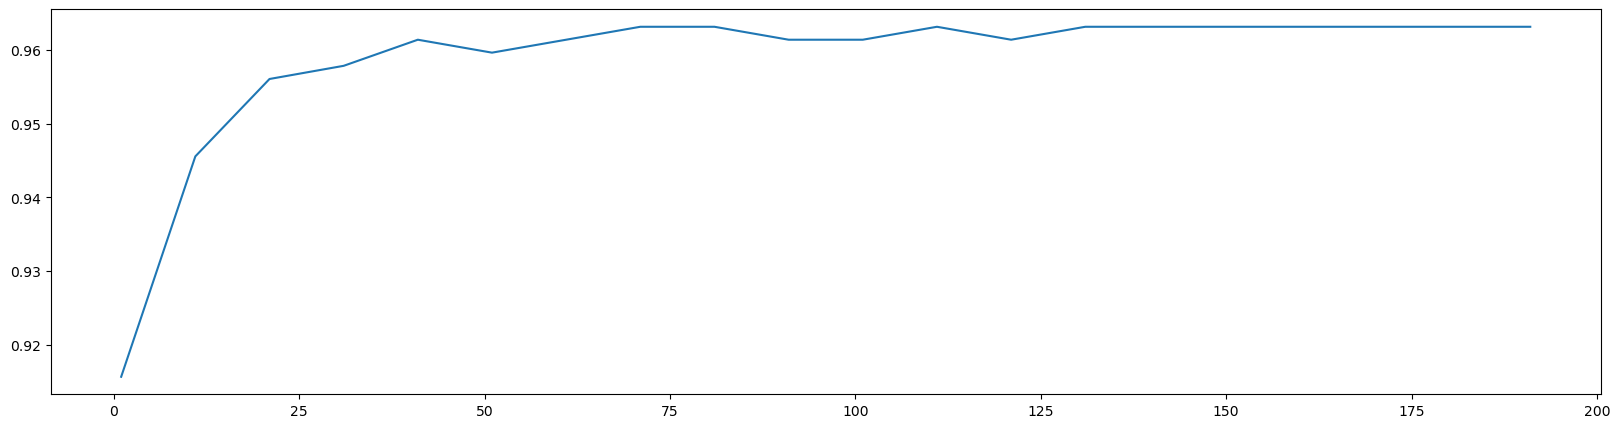

In [23]:
score1 = []
#从0开始,每10棵树选1棵,一直到1000 (0,10,20...,n_estimators=1,11,21...)
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators = i+1,
                                n_jobs = -1,
                                random_state = 90
                                )
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score1.append(score)
    
#上述循环最高的score是多少;最高的score所对应的树木(索引）
print(max(score1),(score1.index(max(score1))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score1)
plt.show()

0.9666353383458647 73


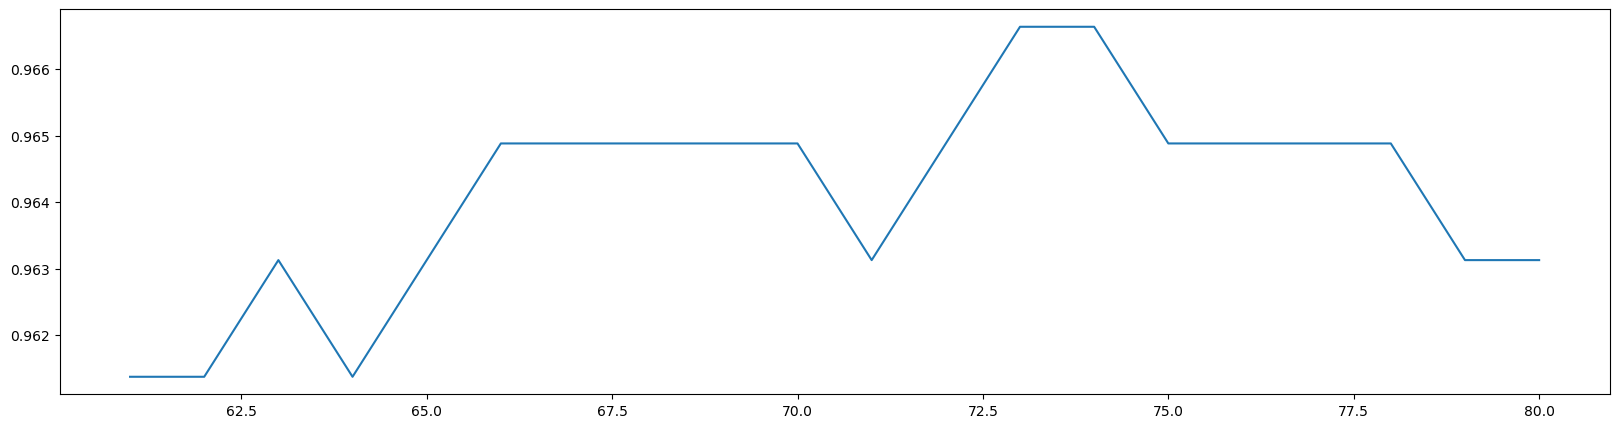

In [25]:
#再确定好的索引范围内细化学习曲线,代码相同
score1 = []
for i in range(61,81):
    rfc = RandomForestClassifier(n_estimators = i,
                                n_jobs = -1,
                                random_state = 90
                                )
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score1.append(score)

print(max(score1),([*range(61,81)][score1.index(max(score1))]))
plt.figure(figsize=[20,5])
plt.plot(range(61,81),score1)
plt.show()

In [26]:
##调参max_depth
param_grid = {'max_depth':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators = 73,
                             random_state = 90,
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_depth': 8}

In [27]:
GS.best_score_

0.9666353383458647

In [28]:
##调参min_samples_split
param_grid = {'min_samples_split':np.arange(2,2+20,1)}
rfc = RandomForestClassifier(n_estimators = 73,
                             max_depth = 8,
                             random_state = 90,
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_split': 2}

In [29]:
GS.best_score_

0.9666353383458647

In [30]:
##调参min_samples_leaf
param_grid = {'min_samples_leaf':np.arange(1,1+20,1)}
rfc = RandomForestClassifier(n_estimators = 73,
                             max_depth = 8,
                             min_samples_split = 2,
                             random_state = 90,
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_leaf': 1}

In [31]:
GS.best_score_

0.9666353383458647

In [32]:
##调参max_features
param_grid = {'max_features':np.arange(2,30,1)}
rfc = RandomForestClassifier(n_estimators = 73,
                             max_depth = 8,
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             random_state = 90,
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_features': 22}

In [33]:
GS.best_score_

0.968421052631579

In [34]:
param_grid = {'criterion':['gini','entropy']}
rfc = RandomForestClassifier(n_estimators = 73,
                             max_depth = 8,
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             random_state = 90,
                             max_features = 22
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'criterion': 'gini'}

In [35]:
GS.best_score_

0.968421052631579

In [36]:
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
rfc = RandomForestClassifier(n_estimators = 73,
                             max_depth = 8,
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             random_state = 90,
                             max_features = 22,
                             criterion = 'gini',
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_leaf_nodes': 25}

In [37]:
GS.best_score_

0.9666666666666666

In [ ]:
##其他调参
#param_grid = {'criterion':['gini','entropy']}
#param_grid = {'max_leaf_nodes':np.arange(25,50,1)}